<a href="https://colab.research.google.com/github/jonathansantoss/portfolio-machine-learning/blob/master/05_DSA_Cap10_Mini_Projeto_Especificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 10 - Mini-Projeto - Agrupando Clientes Por Consumo de Energia</font>

### Especificação

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


A partir de dados de consumo de energia de clientes, nosso trabalho é agrupar os consumidores por similaridade a afim de compreender o comportamento dos clientes e sua relação com o consumo de energia.

Você deve executar as seguintes tarefas:
    
1- Tratar os valores ausentes nos dados.

2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.

3- Encontrar o melhor valor de K para esse conjunto de dados.

4- Criar o modelo K-Means usando o valor de K encontrado no item 3.

5- Criar um Meshgrid para visualização de todos os clusters.

6- Visualizar os centróides.

7- Calcular o Silhoutte Score.

8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).

Dica: Para o item 8, considere a amostra criada no item 2.

In [48]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [49]:
# Carregando os dados
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dados/household_power_consumption.txt', delimiter = ';', low_memory = False)

In [50]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [51]:
names = ['Global_active_power',
                 'Global_reactive_power',
                 'Voltage',	
                 'Global_intensity', 
                 'Sub_metering_1',	
                 'Sub_metering_2',	
                 'Sub_metering_3']
dataset = dataset[names].dropna()

In [52]:
amostra1, _ = train_test_split(dataset, train_size = 0.01)

In [53]:
pca = PCA(n_components=2).fit(amostra1)
pca_2d = pca.transform(amostra1)

In [54]:
param_grid = {"n_clusters": range(2, 12),
              "random_state": [0, 50, 100, 111]}

search = RandomizedSearchCV(
    KMeans(),
    param_distributions=param_grid,
    n_iter=100
    )

search.fit(pca_2d)
search.best_params_

{'n_clusters': 11, 'random_state': 50}

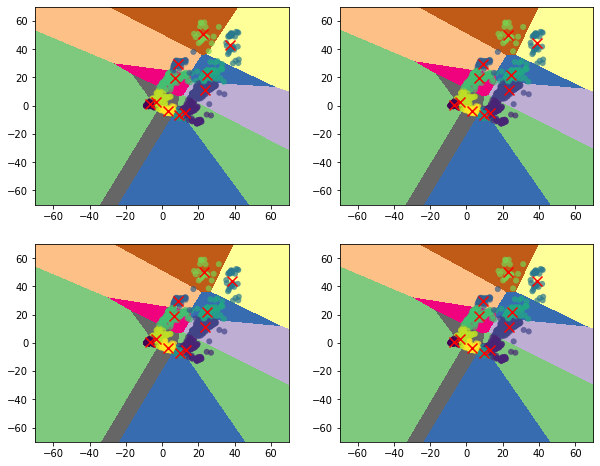

In [55]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

for n_iter in range(1, 5):
  plt.subplot(2, 2, n_iter)

  modelo = KMeans(n_clusters=11, random_state=50, max_iter=n_iter)
  modelo.fit(pca_2d)

  h = 0.02
  xx, yy = np.meshgrid(np.arange(-70, 70, h), np.arange(-70, 70, h))
  z = modelo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  plt.imshow(z,
             interpolation='nearest', 
             cmap = plt.cm.Accent,
             extent = (xx.min(), xx.max(), yy.min(), yy.max()),
             aspect = 'auto',
             origin = 'lower')
  
  plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c = modelo.labels_, edgecolors='none', alpha=.7)
  plt.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths=4)

In [56]:
modelo = KMeans(n_clusters=11, random_state=50)
modelo.fit(pca_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [57]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(pca_2d, modelo.labels_, metric='euclidean'))

Silhouette Coefficient: 0.632


In [58]:
cluster_map = pd.DataFrame(amostra1, columns=classes_names)
cluster_map['Global_active_power'] =pd.to_numeric(amostra1['Global_active_power'])
cluster_map['clusters'] = modelo.labels_
cluster_map.groupby('clusters')['Global_active_power'].mean()

clusters
0     0.358591
1     2.943426
2     4.039506
3     3.267389
4     6.532909
5     1.566303
6     4.409079
7     2.800599
8     5.573619
9     1.678868
10    1.104316
Name: Global_active_power, dtype: float64